# Módulo: MODELOS DE INTELIGENCIA ARTIFICIAL
## Ejercicio práctico 1.
## Sistema Basado en Reglas   
### Análisis de la calidad del aire

De forma similar a lo realizado en el notebook SBR_IRIS, construye un sistema de clasificación de la calidad del aire (AirQuality - AQI) en función de la cantidad de Ozono detectado en el mismo.   
Los valores del nivel de AQI se muestran en la siguiente tabla:  


| NIVEL AQI | RANGO-DESCRIPCIÓN|
|:---------:|:----------------:|
|   BUENO   |     0 - 50       |
| MODERADO  |    51 - 100      |
|CONTAMINADO|   101 - 150      |
|  INSANO   |   151 - 200      |
| PELIGROSO |       > 200      |

Se pide intentar establecer la clasificación según la tabla anterior en base a alguna de las características que conforman el dataset (Valor de O2, Valor de CO, Valor de NO2, Valor de PM2.5, Longitud y Latitud).   
Como los datos son numéricos y no faltan valores, no se requiere ningún procesamiento previo.   

Nuestro objetivo es predecir el AQI, por lo que esta tarea sería de clasificación o de regresión, pero en este caso vamos a tratar de establecer un SBR basado en una de las variables independientes citadas.

<u>Nota sobre la característica ***PM2.5***</u> :   
Este valor se corresponde con la concentración del material particulado (*PM - Particulate Matter*) de la fracción de tamaño PM2,5 (2.5 micrometros), el cúal se encuentra íntimamente asociado a problemas de salud dado que entre sus efectos aparecen impactos claros sobre las enfermedades cardiacas y pulmonares.   

Importamos librerías necesarias

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Ocultamos los warnings de las librerías
import warnings
warnings.filterwarnings("ignore")
# ------------------------------------------------

Cargamos dataset *airquality.csv*

In [ ]:
import os

# Verificamos el directorio actual y listamos archivos
print("Directorio actual:", os.getcwd())
print("Archivos disponibles:", os.listdir())

# Cargamos el dataset (ajusta la ruta si es necesario)
# Cambia la ruta según donde esté el archivo
data = pd.read_csv('../datasets/airquality.csv')

Mostramos los primeros registros

In [6]:
data.head()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,lat,lng
0,51,1,36,0,51,44.7444,44.2031
1,41,1,5,1,41,-5.2900,-44.4900
2,41,1,5,1,41,-11.2958,-41.9869
3,66,1,39,2,66,37.1667,15.1833
4,34,1,34,0,20,53.0167,20.8833


Asignación (mapeo) del nivel de calidad según los valores del mismo

In [7]:
## Sistema Basado en Reglas (SBR) - Clasificación de la calidad del aire


import pandas as pd

# Cargar dataset (ajusta la ruta a tu estructura de carpetas)
data = pd.read_csv("../datasets/airquality.csv")

# Definimos la función de clasificación basada en reglas
def clasificar_aqi(valor):
    if 0 <= valor <= 50:
        return "BUENO"
    elif 51 <= valor <= 100:
        return "MODERADO"
    elif 101 <= valor <= 150:
        return "CONTAMINADO"
    elif 151 <= valor <= 200:
        return "INSANO"
    else:
        return "PELIGROSO"

# Aplicamos la función al dataset (columna AQI Value)
data["AQI_Nivel"] = data["AQI Value"].apply(clasificar_aqi)

# Mostramos los primeros resultados
print(data[["AQI Value", "AQI_Nivel"]].head(10))


   AQI Value AQI_Nivel
0         51  MODERADO
1         41     BUENO
2         41     BUENO
3         66  MODERADO
4         34     BUENO
5         54  MODERADO
6         54  MODERADO
7         64  MODERADO
8         54  MODERADO
9         68  MODERADO


Análisis breve del dataset (EDA)

Dimensiones del dataset: (16695, 7)


,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,lat,lng
0,51,1,36,0,51,44.7444,44.2031
1,41,1,5,1,41,-5.2900,-44.4900
2,41,1,5,1,41,-11.2958,-41.9869
3,66,1,39,2,66,37.1667,15.1833
4,34,1,34,0,20,53.0167,20.8833



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16695 entries, 0 to 16694
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AQI Value        16695 non-null  int64  
 1   CO AQI Value     16695 non-null  int64  
 2   Ozone AQI Value  16695 non-null  int64  
 3   NO2 AQI Value    16695 non-null  int64  
 4   PM2.5 AQI Value  16695 non-null  int64  
 5   lat              16695 non-null  float64
 6   lng              16695 non-null  float64
dtypes: float64(2), int64(5)
memory usage: 913.1 KB
None

Valores nulos por columna:
AQI Value          0
CO AQI Value       0
Ozone AQI Value    0
NO2 AQI Value      0
PM2.5 AQI Value    0
lat                0
lng                0
dtype: int64

Estadísticas básicas:


,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,lat,lng
count,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000
mean,62.998682,1.342138,31.767355,3.819647,59.821324,30.267148,-3.944485
std,43.091971,2.371379,22.839343,5.880677,43.208298,22.947398,73.037148
min,7.000000,0.000000,0.000000,0.000000,0.000000,-54.801900,-171.750000
25%,38.500000,1.000000,20.000000,0.000000,34.000000,16.515450,-75.180000
50%,52.000000,1.000000,29.000000,2.000000,52.000000,38.815800,5.643100
75%,69.000000,1.000000,38.000000,5.000000,69.000000,46.683300,36.275000
max,500.000000,133.000000,222.000000,91.000000,500.000000,70.767000,178.017800


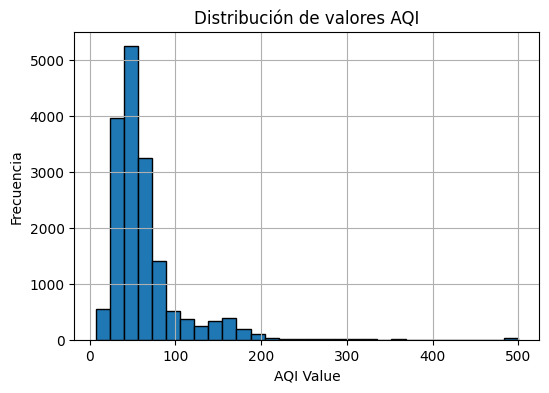

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar dataset
data = pd.read_csv("../datasets/airquality.csv")

# Dimensiones del dataset
print("Dimensiones del dataset:", data.shape)

# Primeras filas
display(data.head())

# Información general
print("\nInformación del dataset:")
print(data.info())

# Valores nulos
print("\nValores nulos por columna:")
print(data.isnull().sum())

# Estadísticas descriptivas
print("\nEstadísticas básicas:")
display(data.describe())

# Distribución del AQI
plt.figure(figsize=(6,4))
data["AQI Value"].hist(bins=30, edgecolor="black")
plt.title("Distribución de valores AQI")
plt.xlabel("AQI Value")
plt.ylabel("Frecuencia")
plt.show()

# Conteo de categorías AQI (si ya añadiste la clasificación SBR)
if "AQI_Nivel" in data.columns:
    data["AQI_Nivel"].value_counts().plot(kind="bar", color="skyblue", edgecolor="black", figsize=(6,4))
    plt.title("Distribución de niveles de AQI")
    plt.xlabel("Nivel AQI")
    plt.ylabel("Frecuencia")
    plt.show()


Definición de reglas

In [9]:
# Definición de reglas como función
def clasificar_aqi(valor):
    if 0 <= valor <= 50:
        return "BUENO"
    elif 51 <= valor <= 100:
        return "MODERADO"
    elif 101 <= valor <= 150:
        return "CONTAMINADO"
    elif 151 <= valor <= 200:
        return "INSANO"
    else:
        return "PELIGROSO"

# Aplicamos las reglas al dataset
data["AQI_Nivel"] = data["AQI Value"].apply(clasificar_aqi)

# Mostramos algunos ejemplos
data[["AQI Value", "AQI_Nivel"]].head(10)


,AQI Value,AQI_Nivel
0,51,MODERADO
1,41,BUENO
2,41,BUENO
3,66,MODERADO
4,34,BUENO
5,54,MODERADO
6,54,MODERADO
7,64,MODERADO
8,54,MODERADO
9,68,MODERADO


Aplicación de reglas

Ejemplos tras aplicar las reglas:


,AQI Value,AQI_Nivel
0,51,MODERADO
1,41,BUENO
2,41,BUENO
3,66,MODERADO
4,34,BUENO
5,54,MODERADO
6,54,MODERADO
7,64,MODERADO
8,54,MODERADO
9,68,MODERADO



Distribución de registros por nivel AQI:
AQI_Nivel
BUENO          7708
MODERADO       7081
CONTAMINADO     899
INSANO          814
PELIGROSO       193
Name: count, dtype: int64


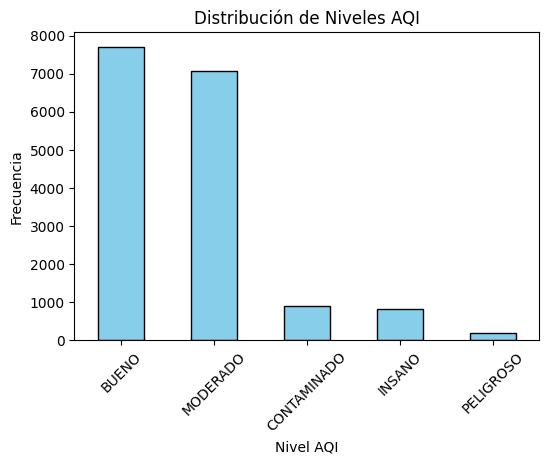

In [10]:
# Aplicación de las reglas al dataset
data["AQI_Nivel"] = data["AQI Value"].apply(clasificar_aqi)

# Mostramos algunos ejemplos
print("Ejemplos tras aplicar las reglas:")
display(data[["AQI Value", "AQI_Nivel"]].head(10))

# Conteo de registros por categoría
print("\nDistribución de registros por nivel AQI:")
print(data["AQI_Nivel"].value_counts())

# Visualización
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
data["AQI_Nivel"].value_counts().plot(
    kind="bar", color="skyblue", edgecolor="black"
)
plt.title("Distribución de Niveles AQI")
plt.xlabel("Nivel AQI")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.show()


Visualización gráfica

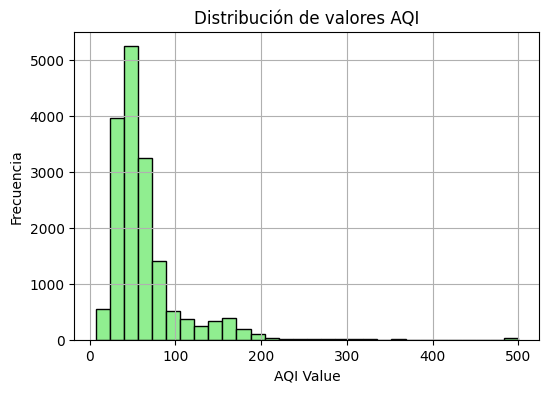

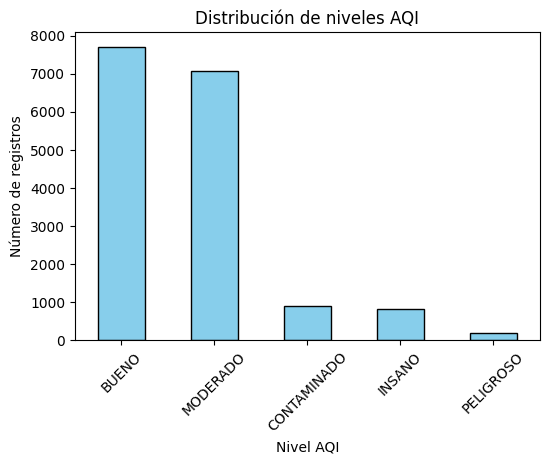

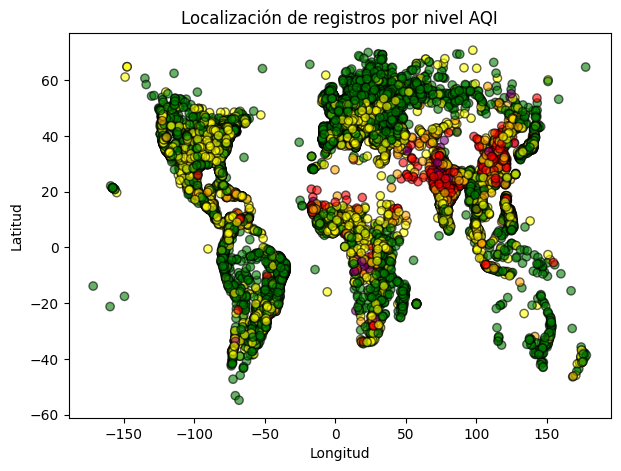

In [11]:
import matplotlib.pyplot as plt

# 1. Histograma de los valores AQI
plt.figure(figsize=(6,4))
data["AQI Value"].hist(bins=30, edgecolor="black", color="lightgreen")
plt.title("Distribución de valores AQI")
plt.xlabel("AQI Value")
plt.ylabel("Frecuencia")
plt.show()

# 2. Gráfico de barras de los niveles de calidad del aire
plt.figure(figsize=(6,4))
data["AQI_Nivel"].value_counts().plot(
    kind="bar", color="skyblue", edgecolor="black"
)
plt.title("Distribución de niveles AQI")
plt.xlabel("Nivel AQI")
plt.ylabel("Número de registros")
plt.xticks(rotation=45)
plt.show()

# 3. Mapa de dispersión (lat/lng) coloreado por nivel AQI
plt.figure(figsize=(7,5))
colores = {
    "BUENO": "green",
    "MODERADO": "yellow",
    "CONTAMINADO": "orange",
    "INSANO": "red",
    "PELIGROSO": "purple"
}
plt.scatter(
    data["lng"], data["lat"],
    c=data["AQI_Nivel"].map(colores),
    alpha=0.6, edgecolors="black"
)
plt.title("Localización de registros por nivel AQI")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()
